In [1]:
import pandas as pd
import band_count
import matplotlib.pyplot as plt

In [2]:
data_dir = "./data/"
data_fn = data_dir + "cleaned_data.txt"
data_grey_fn = data_dir + "cleaned_grey_values.txt"
all_elements = pd.read_csv(data_fn)
print(all_elements.head())

   Distance (um)  Elapsed Time   B11_ppm  Na23_ppm  Mg25_ppm  Al27_ppm  \
0      -1.483983     -1.483983 -0.000987 -1.739987  1.252779 -1.428722   
1      -1.478071     -1.478071  0.273978 -0.963147  2.358353 -1.189735   
2      -1.472164     -1.472164 -0.041514 -1.274842  1.587131 -0.879393   
3      -1.466252     -1.466252  0.646814 -0.961113  1.437627 -1.582681   
4      -1.460344     -1.460344  0.151465 -1.214546  1.474992 -1.570397   

   Si28_ppm   P31_ppm   S34_ppm  Cl35_ppm  ...  Zn66_ppm  Zn68_ppm  Sr88_ppm  \
0 -1.030042  1.095407  0.576121 -1.078462  ...  1.409131  1.572304  1.231484   
1 -0.483173  1.588047  1.585102 -1.104329  ...  1.439062  1.372410  0.979279   
2 -0.694485  1.389658  0.317097 -0.880657  ...  1.674240  1.736563  0.941318   
3 -1.052700  1.525399 -0.236500 -1.136729  ...  1.628649  1.488895 -0.189878   
4 -1.296695  1.237596 -0.067184 -1.486543  ...  1.335298  1.297910  0.958900   

   Ba138_ppm  PbTotal_ppm     pixel  new_distance  new_pixel  case  sex  


In [3]:
grey_values = pd.read_csv(data_grey_fn)
grey_values = grey_values.iloc[::3]
print(grey_values)

      Distance_(pixels)  Gray_Value  new_pixel  case  cleaned_grey sex
0                   432    126.7965          0    43      4.842583   M
3                   435    120.0393          3    43      4.787819   M
6                   438    120.3672          6    43      4.790547   M
9                   441    116.0331          9    43      4.753875   M
12                  444    110.2875         12    43      4.703091   M
...                 ...         ...        ...   ...           ...  ..
5670               1738     95.3029       1472    56      4.557060   F
5673               1741     97.4087       1475    56      4.578916   F
5676               1744    101.0177       1478    56      4.615296   F
5679               1747    104.6929       1481    56      4.631425   F
5682               1750    101.0000       1484    56      4.615121   F

[1895 rows x 6 columns]


In [4]:
elt_name = "Sr88_ppm" # "Cu65_ppm" # "Zn66_ppm" # "Mg25_ppm" # "S34_ppm" # 
elt_array = [
    all_elements[all_elements['case']==i][elt_name] for i in [43,44,55,56]
]
print([len(arr) for arr in elt_array])

[461, 320, 570, 711]


In [5]:
grey_array = [
    grey_values[grey_values['case']==i]["Gray_Value"] for i in [43,44,55,56]
]

In [6]:
scale_switch = 50
max_age = 40
mortality_rate = None#0.1

394
392.5
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 1

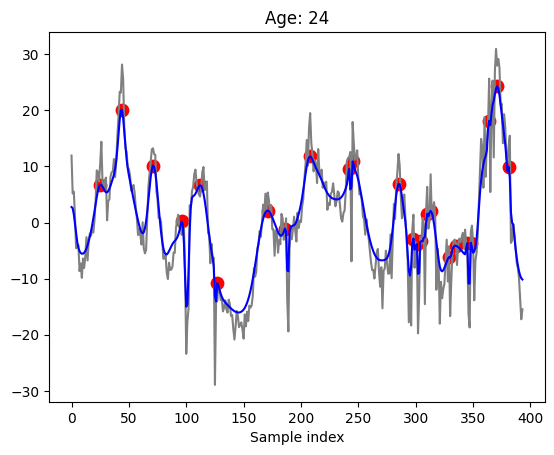

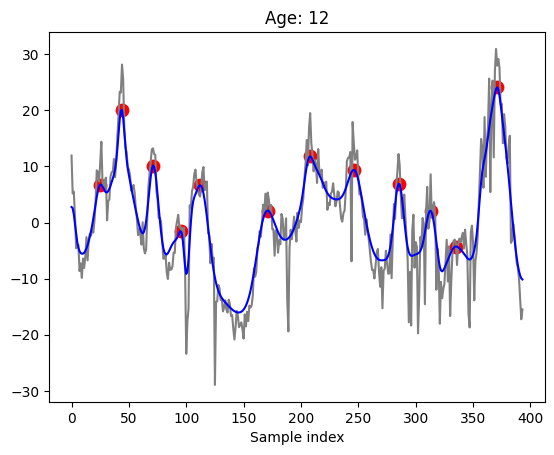

[  0.    0.5   0.5  11.5  24.5  40.5  40.5  41.5  43.5  43.5  44.5  70.5
  71.5  72.5  84.5 100.5 100.5 111.5 112.5 113.5 125.5 125.5 140.5 141.5
 144.5 168.5 188.5 188.5 189.5 190.5 190.5 206.5 209.5 209.5 220.5 243.5
 246.5 266.5 285.5 285.5 294.5 295.5 297.5 302.5 302.5 308.5 309.5 312.5
 312.5 313.5 321.5 324.5 330.5 330.5 346.5 349.5 352.5 356.5 357.5 363.5
 366.5 366.5 367.5 370.5 371.5 371.5 371.5 381.5 383.5 391.5 393. ]
[ 0.  3.  2.  6.  3. 19. 18. 19.  2.  5.  6.  3.  5.  5.  4.  1.  2. 11.
  7.  7.  0.  1. 47. 47. 16.  8.  1.  0.  1.  9. 10.  3.  8.  9. 32.  0.
  6. 10.  5.  4.  1. 41.  0.  1.  0.  0.  0.  4.  5.  4.  2.  6.  1.  0.
  0.  4.  1.  1.  2.  0.  0. 18. 17. 12.  2. 12.  1.  0.  0.  7. 47.]
[  0.    0.5   0.5  11.5  24.5  40.5  40.5  41.5  43.5  43.5  44.5  70.5
  71.5  72.5  84.5 100.5 100.5 111.5 112.5 113.5 125.5 125.5 140.5 141.5
 144.5 168.5 188.5 188.5 189.5 190.5 190.5 206.5 209.5 209.5 220.5 243.5
 246.5 266.5 285.5 285.5 294.5 295.5 297.5 302.5 302.5 308.

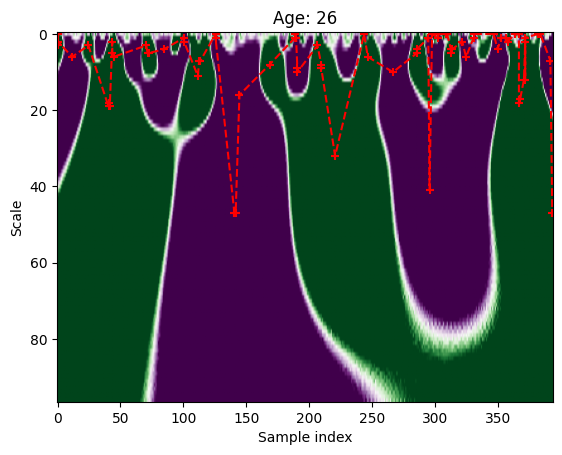

[  0.    0.5   0.5  11.5  24.5  40.5  40.5  41.5  43.5  43.5  44.5  70.5
  71.5  72.5  84.5 100.5 111.5 112.5 113.5 140.5 141.5 144.5 168.5 190.5
 190.5 206.5 209.5 209.5 220.5 246.5 266.5 285.5 285.5 295.5 312.5 312.5
 313.5 321.5 324.5 349.5 357.5 366.5 367.5 370.5 371.5 371.5 391.5 393. ]
[ 2.  2.  3.  6.  3. 19. 18. 19.  2.  5.  6.  3.  5.  5.  4.  2. 11.  7.
  7. 47. 47. 16.  8. 10.  9.  3.  8.  9. 32.  6. 10.  5.  4. 41.  5.  4.
  4.  2.  6.  4.  2. 18. 17. 12. 12.  2.  7. 47.]
[  0.    0.5   0.5  11.5  24.5  40.5  40.5  41.5  43.5  43.5  44.5  70.5
  71.5  72.5  84.5 100.5 111.5 112.5 113.5 140.5 141.5 144.5 168.5 190.5
 190.5 206.5 209.5 209.5 220.5 246.5 266.5 285.5 285.5 295.5 312.5 312.5
 313.5 321.5 324.5 349.5 357.5 366.5 367.5 370.5 371.5 371.5 391.5 393. ]
[ 2.  2.  3.  6.  3. 19. 18. 19.  2.  5.  6.  3.  5.  5.  4.  2. 11.  7.
  7. 47. 47. 16.  8. 10.  9.  3.  8.  9. 32.  6. 10.  5.  4. 41.  5.  4.
  4.  2.  6.  4.  2. 18. 17. 12. 12.  2.  7. 47.]
x1: 0.0
x2: 0.5
x1: 0.

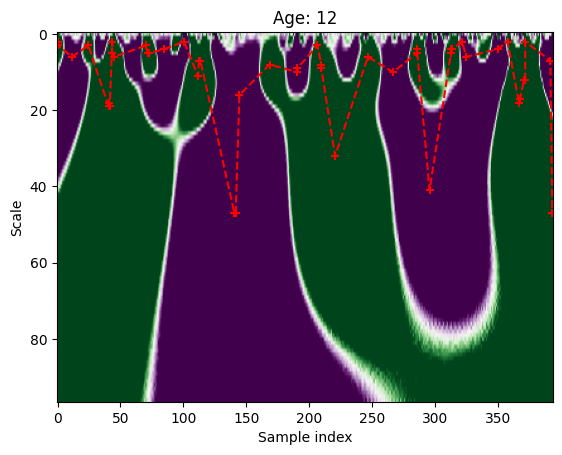

426
424.5
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 1

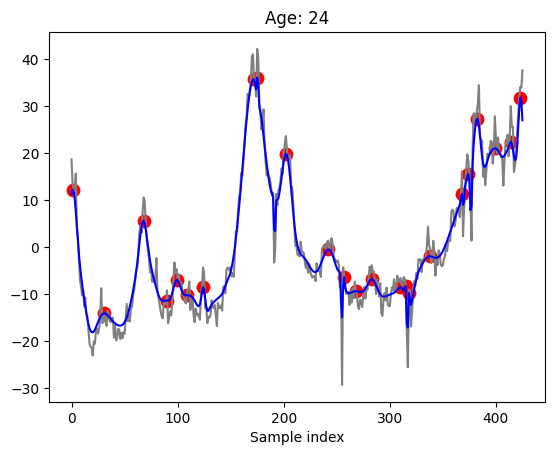

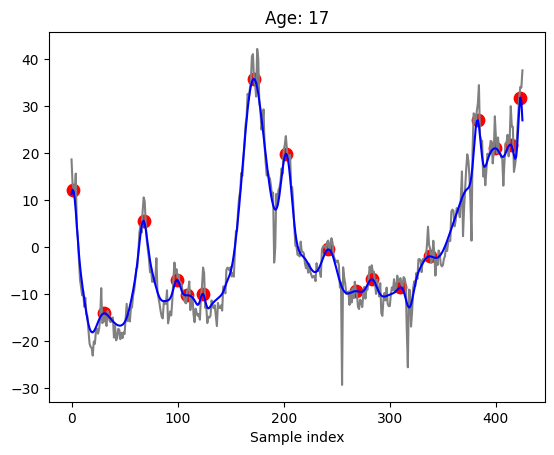

[  0.           1.5          1.5         17.5         17.5
  18.5         31.5         32.5         61.14218009  63.14691943
  66.5         67.5         67.5         68.5         79.5
  92.5         98.5         99.5        101.5        123.5
 124.5        124.5        134.5        146.5        169.5
 170.5        175.5        176.5        177.5        185.5
 186.5        188.5        191.5        191.5        202.5
 202.5        203.5        242.5        243.5        243.5
 254.5        254.5        255.5        256.5        282.5
 283.5        316.5        318.5        318.5        318.5
 334.5        354.5        367.5        369.5        373.5
 376.5        376.5        377.5        380.5        382.5
 401.9478673  403.95260664 406.5        406.5        414.5
 420.5        421.5        423.5        425.        ]
[ 0.  7.  3.  7.  8.  8. 22. 22. 76. 76.  4.  3.  9.  9.  2.  1.  3.  3.
  6.  2.  2.  1. 18.  2. 12. 10.  0. 25. 26. 36. 37.  7.  1.  0.  5.  6.
  6.  8.  9.  8.  0.  1.  

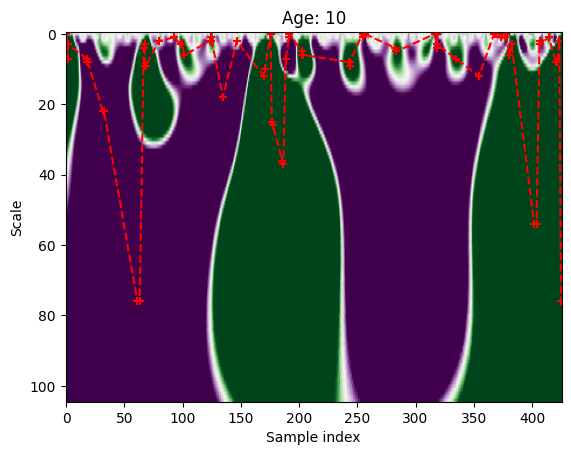

[  0.           1.5          1.5         17.5         17.5
  18.5         31.5         32.5         61.14218009  63.14691943
  66.5         67.5         67.5         68.5         79.5
  98.5         99.5        101.5        123.5        124.5
 134.5        146.5        169.5        170.5        176.5
 177.5        185.5        186.5        188.5        202.5
 202.5        203.5        242.5        243.5        243.5
 282.5        283.5        318.5        318.5        334.5
 354.5        380.5        382.5        401.9478673  403.95260664
 406.5        406.5        420.5        421.5        423.5
 425.        ]
[ 2.  7.  3.  7.  8.  8. 22. 22. 76. 76.  4.  3.  9.  9.  2.  3.  3.  6.
  2.  2. 18.  2. 12. 10. 25. 26. 36. 37.  7.  5.  6.  6.  8.  9.  8.  4.
  5.  3.  4.  7. 12.  6.  3. 54. 54.  3.  2.  8.  8.  2. 76.]
[  0.           1.5          1.5         17.5         17.5
  18.5         31.5         32.5         61.14218009  63.14691943
  66.5         67.5         67.5         68.5   

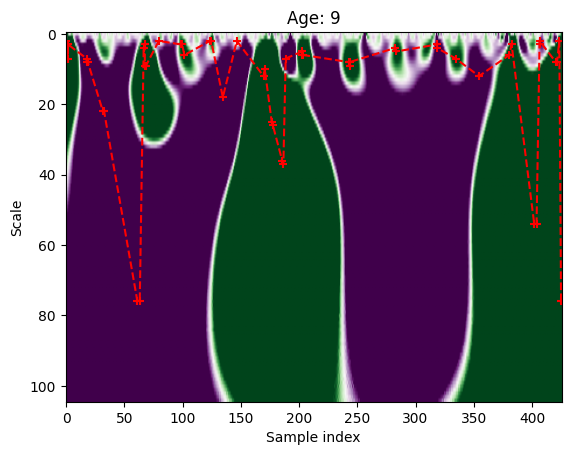

580
578.5
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 1

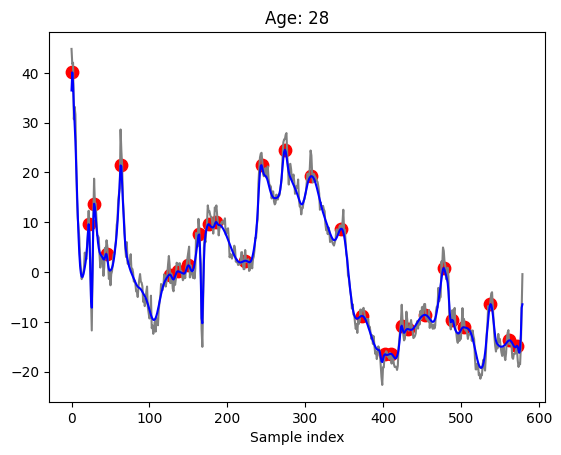

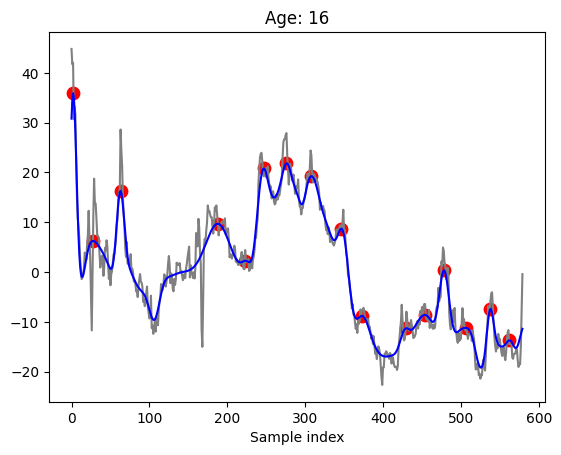

[0.00000000e+00 5.00000000e-01 1.50000000e+00 2.50000000e+00
 2.50000000e+00 3.50000000e+00 4.50000000e+00 6.50000000e+00
 2.45000000e+01 2.55000000e+01 2.65000000e+01 2.65000000e+01
 3.05000000e+01 3.15000000e+01 4.45000000e+01 4.55000000e+01
 6.25000000e+01 6.35000000e+01 6.35000000e+01 6.35000000e+01
 6.45000000e+01 6.45000000e+01 6.85000000e+01 8.85000000e+01
 1.03500000e+02 1.06500000e+02 1.07500000e+02 1.30500000e+02
 1.31500000e+02 1.49500000e+02 1.50500000e+02 1.56500000e+02
 1.67500000e+02 1.67500000e+02 1.68500000e+02 1.68500000e+02
 1.68500000e+02 1.83500000e+02 1.83500000e+02 1.85500000e+02
 2.21500000e+02 2.21500000e+02 2.23385417e+02 2.31500000e+02
 2.31500000e+02 2.32500000e+02 2.42500000e+02 2.45500000e+02
 2.73500000e+02 2.73500000e+02 2.76500000e+02 2.77479167e+02
 2.91503472e+02 2.96500000e+02 2.96500000e+02 3.10500000e+02
 3.47500000e+02 3.48500000e+02 3.63500000e+02 3.79500000e+02
 3.92500000e+02 3.93500000e+02 3.98500000e+02 3.99500000e+02
 4.03500000e+02 4.165000

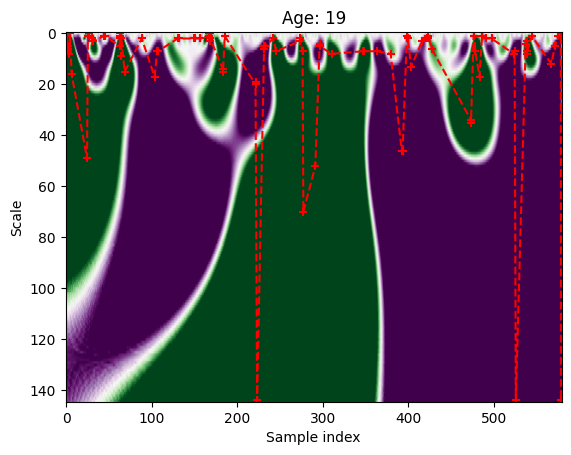

[  0.           1.5          2.5          2.5          3.5
   6.5         24.5         62.5         64.5         68.5
 103.5        106.5        107.5        183.5        183.5
 221.5        221.5        223.38541667 231.5        231.5
 232.5        245.5        276.5        277.47916667 291.50347222
 296.5        296.5        310.5        347.5        348.5
 363.5        379.5        392.5        393.5        403.5
 427.5        473.5        473.5        478.5        483.5
 523.5        524.5        525.90972222 537.5        539.5
 539.5        567.5        571.5        579.        ]
[  4.   4.   5.   6.   8.  16.  49.   5.   9.  15.  17.   7.   7.  15.
  14.  19.  20. 144.   5.   6.   5.   7.   7.  70.  52.   4.   5.   8.
   7.   7.   7.   8.  46.  46.  13.   6.  35.  34.   7.  17.   8.   7.
 144.   4.   7.   8.  12.   5. 144.]
[  0.           1.5          2.5          2.5          3.5
   6.5         24.5         62.5         64.5         68.5
 103.5        106.5        107.5        

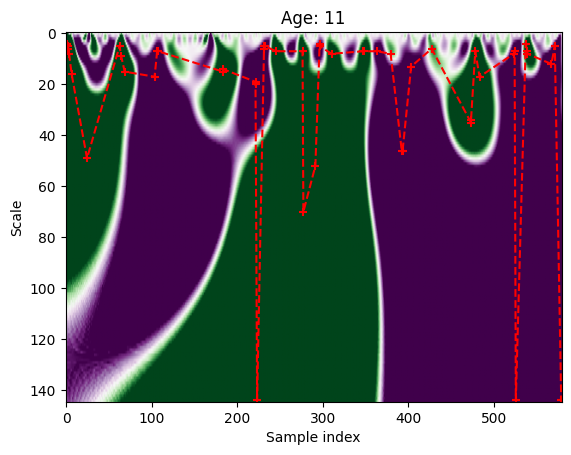

495
493.5
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 1

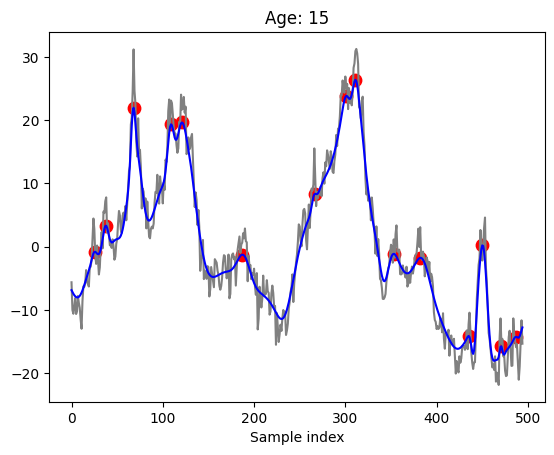

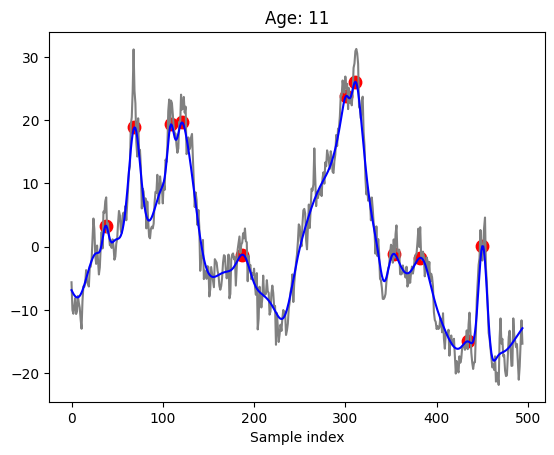

[  0.           7.5          7.5          8.5         24.5
  36.5         37.5         67.5         68.5         68.5
  69.5         87.5         93.3755102   95.38367347  95.38367347
 107.5        108.5        115.5        120.5        121.5
 121.5        131.5        145.5        152.5        188.5
 188.5        227.5        233.5        265.5        294.5
 295.5        305.5        306.24081633 308.5        309.5
 309.5        311.5        313.5        314.5        319.5
 336.5        342.5        354.5        383.5        384.5
 415.5        440.5        448.5        449.5        450.5
 450.5        451.5        460.86938776 462.87755102 462.87755102
 470.5        490.5        494.        ]
[ 1. 10. 11. 10.  2.  3.  3.  2.  8.  4.  7. 10. 58. 58. 60.  3.  3.  3.
 16. 16. 15.  1.  7. 16.  7.  8. 20.  9.  2. 35. 35.  3. 54. 15. 14. 15.
  2.  4.  5.  1. 11.  5.  6.  9.  9. 18.  2. 13. 14.  5.  6.  5. 88. 90.
 88.  1.  2. 90.]
[  0.           7.5          7.5          8.5         24.5


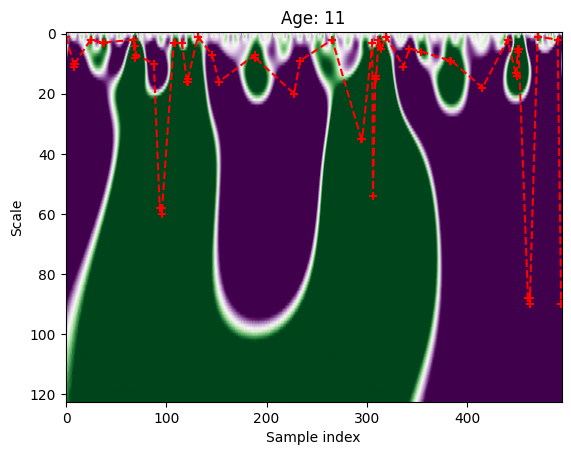

[  0.           7.5          7.5          8.5         36.5
  37.5         68.5         68.5         69.5         87.5
  93.3755102   95.38367347  95.38367347 107.5        108.5
 115.5        120.5        121.5        121.5        145.5
 152.5        188.5        188.5        227.5        233.5
 294.5        295.5        305.5        306.24081633 308.5
 309.5        309.5        313.5        314.5        336.5
 342.5        354.5        383.5        384.5        415.5
 448.5        449.5        450.5        450.5        451.5
 460.86938776 462.87755102 462.87755102 494.        ]
[ 3. 11. 10. 10.  3.  3.  4.  8.  7. 10. 58. 60. 58.  3.  3.  3. 16. 15.
 16.  7. 16.  8.  7. 20.  9. 35. 35.  3. 54. 15. 14. 15.  4.  5. 11.  5.
  6.  9.  9. 18. 13. 14.  5.  6.  5. 88. 90. 88. 90.]
[  0.           7.5          7.5          8.5         36.5
  37.5         68.5         68.5         69.5         87.5
  93.3755102   95.38367347  95.38367347 107.5        108.5
 115.5        120.5        121.5      

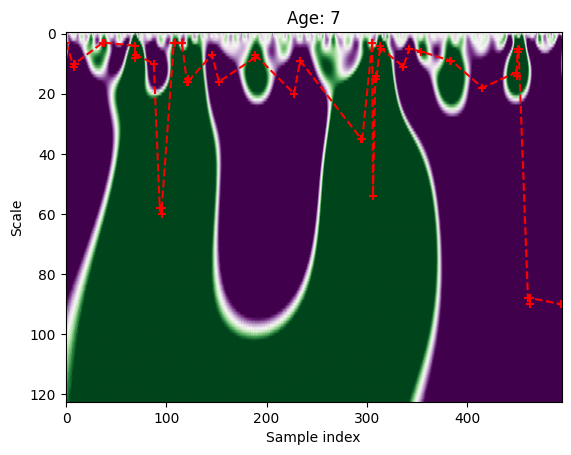

In [7]:
for i in range(len(grey_array)):
    print(len(grey_array[i]))
    counter = band_count.BandCounter(grey_array[i], max_age, mortality_rate, scale_switch)
    p = counter.plot(method="peaks", filter=False)
    plt.show()
    p = counter.plot(method="peaks", filter=True)
    plt.show()
    p = counter.plot(method="scalogram", filter=False)
    plt.show()
    p = counter.plot(method="scalogram", filter=True)
    plt.show()

459.5
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.


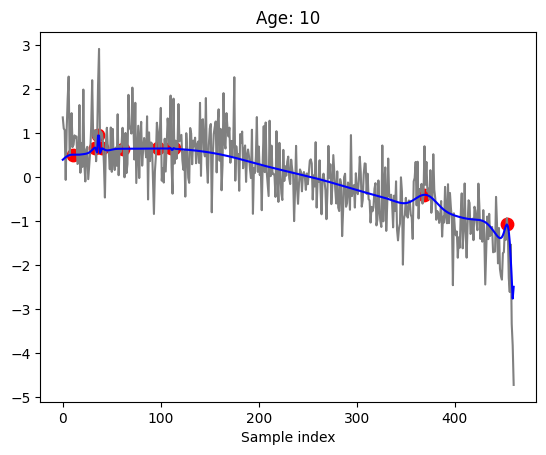

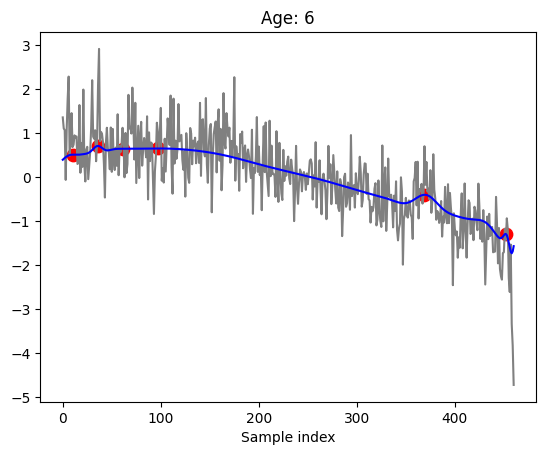

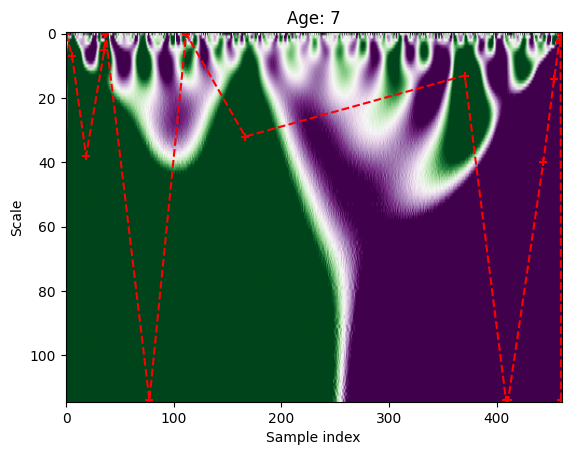

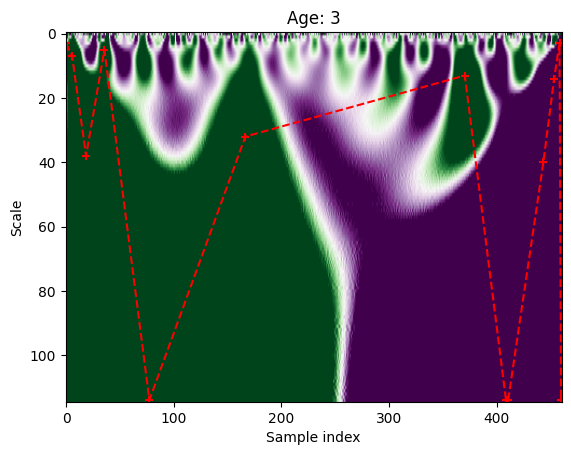

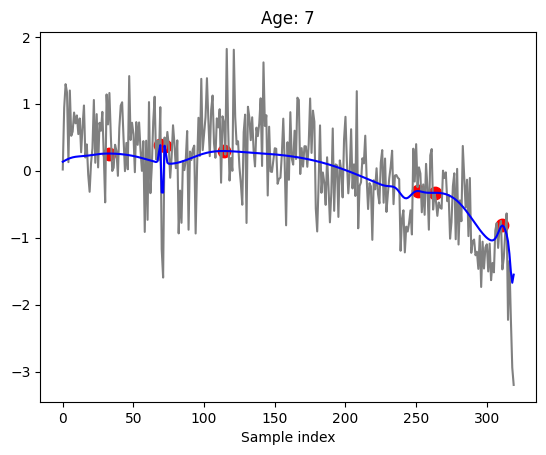

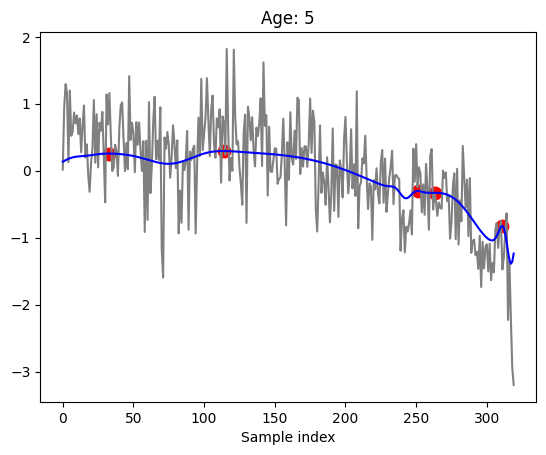

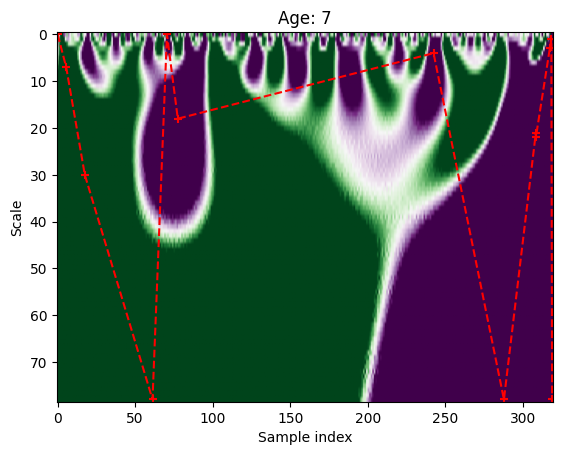

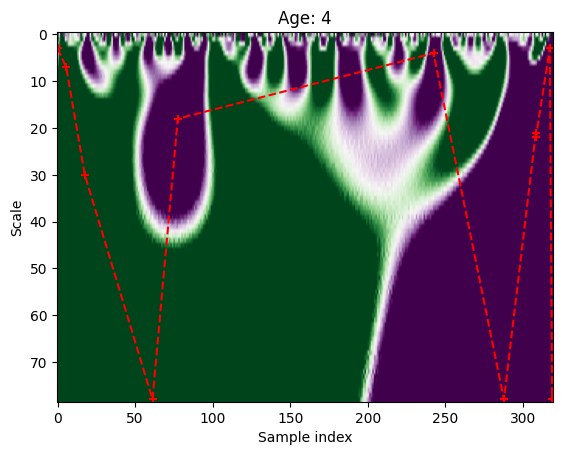

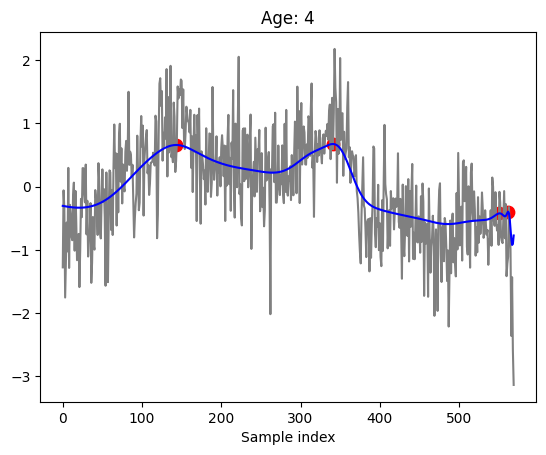

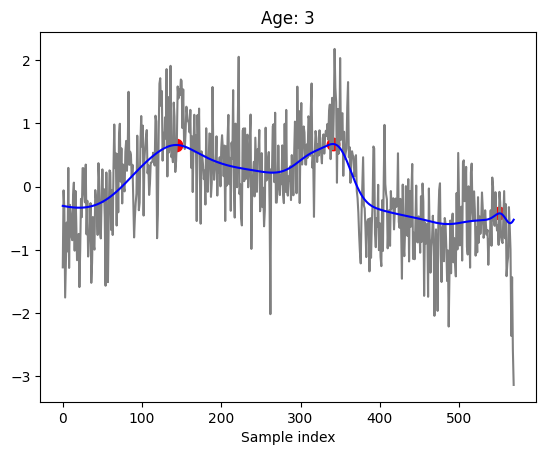

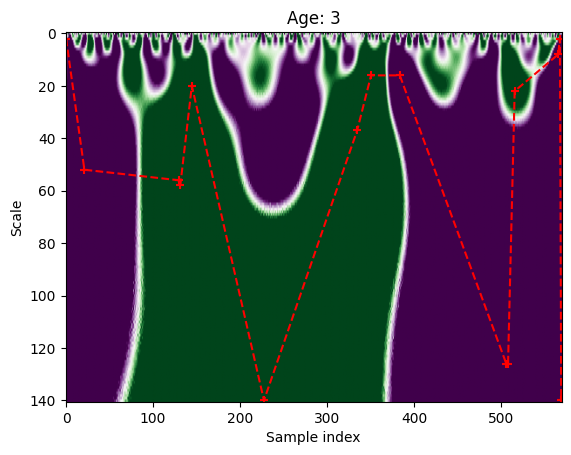

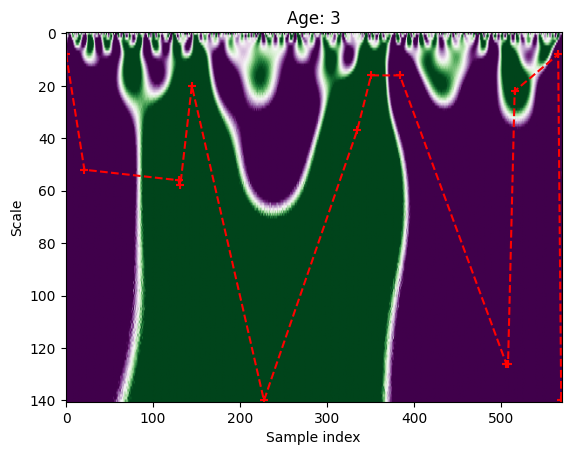

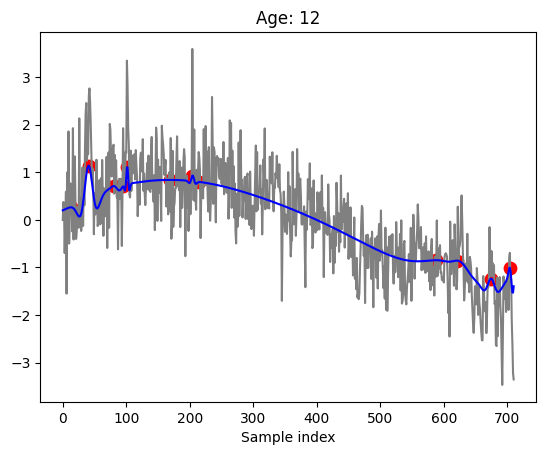

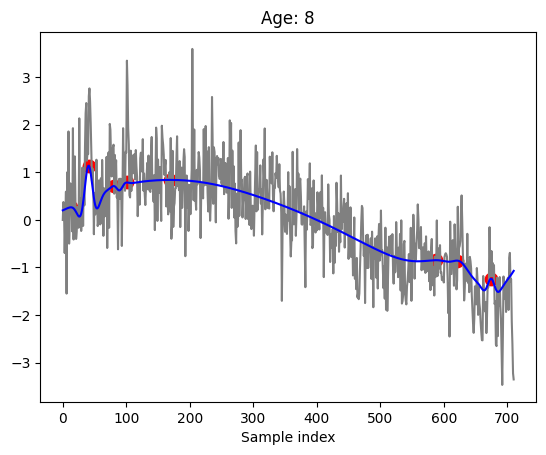

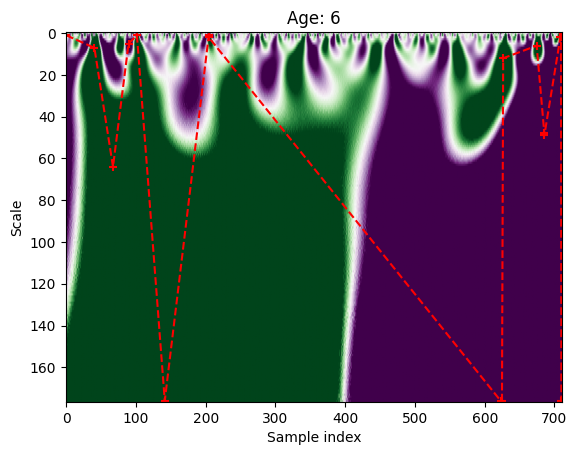

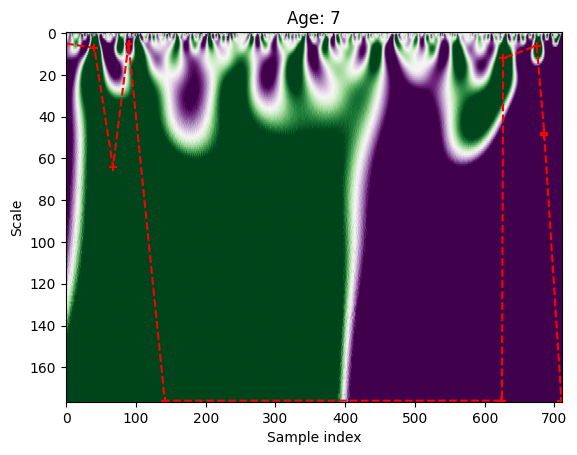

In [8]:
for i in range(len(elt_array)):
    counter = band_count.BandCounter(elt_array[i], max_age, mortality_rate, scale_switch)
    p = counter.plot(method="peaks", filter=False)
    p = counter.plot(method="peaks", filter=True)
    p = counter.plot(method="scalogram", filter=False)
    p = counter.plot(method="scalogram", filter=True)

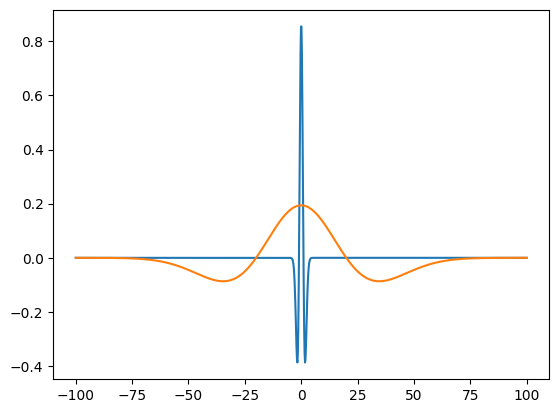

0.0
7.048102770843556e-07


In [9]:
import numpy as np

x = np.linspace(-100,100, num=1000)
y1 = band_count.denoising.ricker_wavelet(x,1,0)
y2 = band_count.denoising.ricker_wavelet(x,20,0)

plt.figure()
plt.plot(x,y1, label="s=1")
plt.plot(x,y2, label="s=2")
plt.show()
print(np.mean(y1))
print(np.mean(y2))
